# Data Cleaning with Python
Data cleaning is essential in Data Science. Your success in doing a proper Exploratory Data Analysis and building Machine Learning models depends on how well you clean and prepare your data. The process of cleaning usually includes the following (but not always limiwted to):

    Convert certain columns to appropriate types (for example, dates should be in datatime format, etc.)
    Dealing with outliers (values that deviate from the rest of the data distribution)
    Discarding unnecessary features (columns that are not useful)
    Dealing with missing values in both rows and columns

Assignment Steps:

Step 1: Download a dataset from: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip. Import the data to Python.

Step 2: Clean your dataset, applying the techniques mentioned above, but not limited to them. 

Step 3: Export your data to a CSV file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# ! dir 
# list items in current directory and identify the downloaded csv file

### Load data set

In [3]:
df = pd.read_csv('m3w3_bank-full.csv', sep=';')

### Learning about the data set

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(45211, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### There is no null/missing value to deal with 

In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Dealing with outliers 
From above, the pdays and previous columns suggests outliers needing more investingation

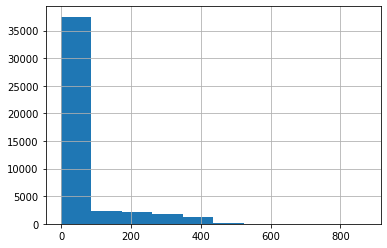

In [9]:
df['pdays'].hist()

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
*Even though there exists an outlier, this information is valid and should remain untouched*  

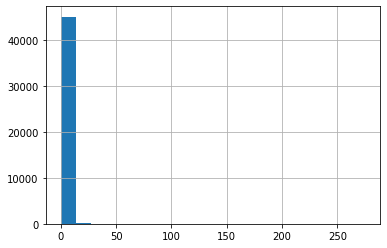

In [10]:
df['previous'].hist(bins=20)

previous: number of contacts performed before this campaign and for this client (numeric)
*There exist an outlier, this variable is almost 0 throughout the dataset and serves no real effect if removed*
Hence it will be dropped!

In [11]:
df0 = df.drop('previous', axis=1)

### Discarding Unnecessary features

Remove column y as it is the result(output variable) of a previous analysis

In [12]:
df1 = df0.drop('y', axis=1)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,unknown


In [13]:
df1[['month']].dtypes

month    object
dtype: object

### Creating one date column: 
#### deal with different data types of day and month, derive year column and collapse all three columns to one datetime type column
There is no year column to easily transform the needed columns into one dat column

From the text file accompanying this dataset, I found this statement    
 > bank-full.csv with all examples, **ordered by date** (from May 2008 to November 2010).
    
Below are the procedures to add a year column, making it possible to drop 3 individual columns(in different formats) for one date columns(in date format)

In [14]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

#there are two 'jan' occurence between May 2008 to November 2010 i.e. Jan 2009 and Jan 2010
jan_2009 = getIndexes(df1[['month']],'jan')[0][0]
jan_2010 = getIndexes(df1[['month']][jan_2009:],'jan')[-1][0]

y2008 = ['2008' for month in df1['month'][:jan_2009]]
y2009 = ['2009' for month in df1['month'][jan_2009:jan_2010]]
y2010 = ['2010' for month in df1['month'][jan_2010:]]

df1['year'] = y2008 + y2009 + y2010

df1['date'] = [str(day) + month + year for day, month, year in df1[['day', 'month', 'year']].values]

In [15]:
df1['date'] = pd.to_datetime(df1['date'])
df2 = df1

In [16]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,year,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,unknown,2008,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,unknown,2008,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,unknown,2008,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,unknown,2008,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,unknown,2008,2008-05-05


### Dropping the day, month, year columns
They are now useless since the date column replaces all three of them and in a unified datetime format

In [17]:
df3 = df2.drop(['day', 'month', 'year'], axis=1)

In [18]:
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,poutcome,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,unknown,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,unknown,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,unknown,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,unknown,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,unknown,2008-05-05


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
poutcome     45211 non-null object
date         45211 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 4.8+ MB


As exppected type of date is datetime64

### Exporting the new df as csv

In [20]:
df3.to_csv('new_bank_dataset.csv')

In [21]:
#ensuring export worked, find 'new_bank_dataset.csv' in the list :-)


! dir

 Volume in drive C is odartei
 Volume Serial Number is 0002-752F

 Directory of C:\Users\Administrator\Desktop\ELU\elu_notebooks\M3

23/02/2020  12:38 AM    <DIR>          .
23/02/2020  12:38 AM    <DIR>          ..
21/02/2020  01:35 PM    <DIR>          .ipynb_checkpoints
31/01/2020  03:23 AM           399,187 basic_sql_query_structure.png
29/11/2015  11:53 AM           884,736 chinook.db
09/02/2020  06:41 PM             1,823 Connecting to Twitter API.ipynb
10/02/2020  02:53 AM               492 current.csv
31/01/2020  03:23 AM            67,584 factbook.db
10/02/2020  02:53 AM            16,515 forecast.csv
31/01/2020  03:23 AM           167,889 joins.png
31/01/2020  05:17 PM             9,290 m3-w2_api_class.ipynb
01/02/2020  02:21 PM           812,780 M3W1_workshop_exercise.ipynb
18/02/2020  12:36 PM         4,655,560 m3w3_bank-full.csv
18/02/2020  12:36 PM             3,864 m3w3_bank-names.txt
18/02/2020  12:36 PM           465,996 m3w3_bank.csv
03/02/2020  02:10 AM            16